## To achieve this in Python, you can use the following approach:
- Check if the paper exists: Use the crossrefapi or requests library to query the CrossRef API.
- Retrieve journal impact factor: Use the Web of Science, Scopus, or Journal Citation Reports (JCR) databases, but they require institutional access or an API key.
- Alternative sources: If you do not have API access to Web of Science or Scopus, you can scrape impact factors from sources like Scimago Journal Rank (SJR).

##Steps:
- Query CrossRef API to check if DOI exists.
- If DOI is valid, extract journal name and publication year.
- Query Scimago or Web of Science (if access is available) for impact factor.

- https://api.crossref.org/works/10.1007/s00339-021-04577-8

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
def check_doi_existence(doi):
    """Check if the DOI exists using the CrossRef API."""
    crossref_url = f"https://api.crossref.org/works/{doi}"
    response = requests.get(crossref_url)
    
    if response.status_code == 200:
        data = response.json()
        journal = data['message'].get('container-title', ['Unknown Journal'])[0]
        year = data['message'].get('published-print', {}).get('date-parts', [[None]])[0][0]
        return True, journal, year
    else:
        return False, None, None

In [3]:
def get_impact_factor(journal_name):
    """Fetch impact factor from Scimago Journal Rank (SJR) (alternative to Web of Science)."""
    search_url = f"https://www.scimagojr.com/journalsearch.php?q={journal_name.replace(' ', '+')}&tip=sid"
    response = requests.get(search_url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        impact_factor_section = soup.find("td", class_="metric")
        if impact_factor_section:
            return impact_factor_section.text.strip()
    
    return "Impact Factor Not Found"


In [8]:
# Example DOIs
doi_list = [
    "10.1038/s41586-020-2649-2",  # Example DOI
    "10.1007/s00382-021-05718-9",
    "10.1007/s00339-021-04577-8", #start from here
    "10.1007/s00339-021-04801-5",
    "10.1007/s12010-022-03950-4",
    "10.1007/s11356-021-16846-3",
    "10.1007/s41742-022-00418-5",
    "10.1007/s00284-022-02854-0"
]
doi_list

['10.1038/s41586-020-2649-2',
 '10.1007/s00382-021-05718-9',
 '10.1007/s00339-021-04577-8',
 '10.1007/s00339-021-04801-5',
 '10.1007/s12010-022-03950-4',
 '10.1007/s11356-021-16846-3',
 '10.1007/s41742-022-00418-5',
 '10.1007/s00284-022-02854-0']

In [7]:
for doi in doi_list:
    exists, journal, year = check_doi_existence(doi)
    if exists:
        print(f"DOI: {doi} | Journal: {journal} | Year: {year}")
        impact_factor = get_impact_factor(journal)
        print(f"Impact Factor: {impact_factor}")
    else:
        print(f"DOI: {doi} does not exist.")

DOI: 10.1038/s41586-020-2649-2 | Journal: Nature | Year: 2020
Impact Factor: Impact Factor Not Found
DOI: 10.1007/s00382-021-05718-9 does not exist.
DOI: 10.1007/s00339-021-04577-8 | Journal: Applied Physics A | Year: 2021
Impact Factor: Impact Factor Not Found
DOI: 10.1007/s00339-021-04801-5 | Journal: Applied Physics A | Year: 2021
Impact Factor: Impact Factor Not Found
DOI: 10.1007/s12010-022-03950-4 | Journal: Applied Biochemistry and Biotechnology | Year: 2023
Impact Factor: Impact Factor Not Found
DOI: 10.1007/s11356-021-16846-3 | Journal: Environmental Science and Pollution Research | Year: 2022
Impact Factor: Impact Factor Not Found
DOI: 10.1007/s41742-022-00418-5 | Journal: International Journal of Environmental Research | Year: 2022
Impact Factor: Impact Factor Not Found
DOI: 10.1007/s00284-022-02854-0 | Journal: Current Microbiology | Year: 2022
Impact Factor: Impact Factor Not Found


## Scopus/ WoS
-  Web of Science API (Clarivate) : Steps
    - Get API Access: Request an API key from Clarivate.
    - Use the Web of Science Journal API to retrieve impact factors.


In [6]:
import requests

# Replace with your Web of Science API key
WOS_API_KEY = "your_api_key_here"

def get_wos_impact_factor(journal_name):
    """Fetch Journal Impact Factor from Web of Science (JCR)."""
    base_url = "https://api.clarivate.com/apis/wos-journals/v1"
    headers = {"X-ApiKey": WOS_API_KEY}

    response = requests.get(f"{base_url}?journal={journal_name}", headers=headers)

    if response.status_code == 200:
        data = response.json()
        impact_factor = data.get("impactFactor", "Not Found")
        return impact_factor
    else:
        return "Error: Unable to fetch impact factor"

# Example usage
journal = "Nature"
impact_factor = get_wos_impact_factor(journal)
print(f"Journal: {journal} | WoS Impact Factor: {impact_factor}")

Journal: Nature | WoS Impact Factor: Error: Unable to fetch impact factor


## Option 2: Scopus API (Elsevier)
- Steps
    - Get API Key: Sign up on Elsevier Developer Portal.
    - Use the Scopus API to fetch journal metrics.

Python Code for Scopus API

In [ ]:
import requests

# Replace with your Scopus API key
SCOPUS_API_KEY = "your_api_key_here"

def get_scopus_impact_factor(journal_name):
    """Fetch Journal Metrics from Scopus API."""
    base_url = "https://api.elsevier.com/content/serial/title"
    params = {
        "title": journal_name,
        "apiKey": SCOPUS_API_KEY
    }
    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        data = response.json()
        impact_factor = data.get("serial-metadata-response", {}).get("entry", [{}])[0].get("SJR", "Not Found")
        return impact_factor
    else:
        return "Error: Unable to fetch impact factor"

# Example usage
journal = "Nature"
impact_factor = get_scopus_impact_factor(journal)
print(f"Journal: {journal} | Scopus SJR Impact Factor: {impact_factor}")

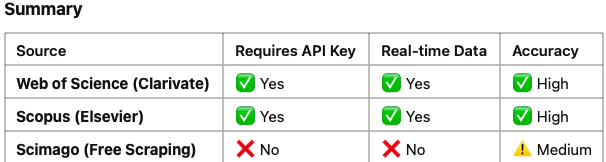

## Hbaerno
- To extract metadata (title, journal, date of publishing, authors) from a list of DOIs in Python, you can use the habanero library, which interfaces with the CrossRef API. Here’s how you can do it:

In [13]:
#pip install habanero
from habanero import cn
import pandas as pd

In [18]:
dois = [
    "10.1007/s00339-021-04577-8", #start from here
    "10.1007/s00339-021-04801-5",
    "10.1007/s12010-022-03950-4",
    "10.1007/s11356-021-16846-3",
    "10.1007/s41742-022-00418-5",
    "10.1007/s00284-022-02854-0"
]
dois

['10.1007/s00339-021-04577-8',
 '10.1007/s00339-021-04801-5',
 '10.1007/s12010-022-03950-4',
 '10.1007/s11356-021-16846-3',
 '10.1007/s41742-022-00418-5',
 '10.1007/s00284-022-02854-0']

In [14]:
# Function to fetch metadata
def get_metadata(doi):
    try:
        metadata = cn.content_negotiation(ids=doi, format="citeproc-json")
        return {
            "DOI": doi,
            "Title": metadata.get("title", "N/A"),
            "Journal": metadata.get("container-title", "N/A"),
            "Date": metadata.get("issued", {}).get("date-parts", [[None]])[0][0],
            "Authors": ", ".join([author["given"] + " " + author["family"] for author in metadata.get("author", [])]) if "author" in metadata else "N/A"
        }
    except Exception as e:
        return {"DOI": doi, "Title": "Error", "Journal": "Error", "Date": "Error", "Authors": "Error"}

# Fetch metadata for all DOIs
metadata_list = [get_metadata(doi) for doi in dois]

# Convert to DataFrame
df = pd.DataFrame(metadata_list)

In [15]:
df

,DOI,Title,Journal,Date,Authors
0,10.1038/s41586-020-2649-2,Error,Error,Error,Error
1,10.1126/science.abb3673,Error,Error,Error,Error
2,10.1007/s00339-021-04577-8,Error,Error,Error,Error
3,10.1007/s00339-021-04801-5,Error,Error,Error,Error
4,10.1007/s12010-022-03950-4,Error,Error,Error,Error
5,10.1007/s11356-021-16846-3,Error,Error,Error,Error
6,10.1007/s41742-022-00418-5,Error,Error,Error,Error
7,10.1007/s00284-022-02854-0,Error,Error,Error,Error


In [24]:
# Function to fetch metadata from CrossRef
def get_metadata(doi):
    url = f"https://api.crossref.org/works/{doi}"
    headers = {"User-Agent": "doi-metadata-fetcher/1.0 (mailto:your-email@example.com)"}
    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()
        
        item = data.get("message", {})

        # Extracting publication date (Year, Month, Day if available)
        date_parts = item.get("published-print", item.get("published-online", {})).get("date-parts", [[None]])
        publication_date = "-".join(map(str, date_parts[0])) if date_parts[0][0] else "N/A"

        return {
            "DOI": doi,
            "Title": item.get("title", ["N/A"])[0],
            "Journal": item.get("container-title", ["N/A"])[0],
            "Publication Date": publication_date,
            "Authors": ", ".join([f"{a['given']} {a['family']}" for a in item.get("author", [])]) if "author" in item else "N/A"
        }
    except requests.exceptions.RequestException as e:
        return {"DOI": doi, "Title": "Error", "Journal": "Error", "Publication Date": "Error", "Authors": "Error"}

# Fetch metadata for all DOIs
metadata_list = [get_metadata(doi) for doi in dois]

# Convert to DataFrame
df = pd.DataFrame(metadata_list)
df.shape

(6, 5)

In [25]:
df.to_clipboard()

In [21]:
def get_metadata(doi):
    url = f"https://api.crossref.org/works/{doi}"
    headers = {"User-Agent": "doi-metadata-fetcher/1.0 (mailto:your-email@example.com)"}
    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()
        
        item = data.get("message", {})

        # Extracting publication date (Year, Month, Day if available)
        date_parts = item.get("published-print", item.get("published-online", {})).get("date-parts", [[None]])
        publication_date = "-".join(map(str, date_parts[0])) if date_parts[0][0] else "N/A"

        # Extract authors and their affiliations
        authors_data = item.get("author", [])
        authors_info = []
        for author in authors_data:
            name = f"{author.get('given', '')} {author.get('family', '')}".strip()
            affiliations = "; ".join([aff["name"] for aff in author.get("affiliation", [])]) if "affiliation" in author else "N/A"
            authors_info.append(f"{name} ({affiliations})" if affiliations != "N/A" else name)

        return {
            "DOI": doi,
            "Title": item.get("title", ["N/A"])[0],
            "Journal": item.get("container-title", ["N/A"])[0],
            "Publication Date": publication_date,
            "Authors & Affiliations": ", ".join(authors_info) if authors_info else "N/A"
        }
    except requests.exceptions.RequestException as e:
        return {"DOI": doi, "Title": "Error", "Journal": "Error", "Publication Date": "Error", "Authors & Affiliations": "Error"}

# Fetch metadata for all DOIs
metadata_list = [get_metadata(doi) for doi in dois]

# Convert to DataFrame
df = pd.DataFrame(metadata_list)

In [22]:
df

,DOI,Title,Journal,Publication Date,Authors & Affiliations
0,10.1007/s00339-021-04577-8,"Effect of concentration on lattice strain, die...",Applied Physics A,2021-6,"U. K. Dwivedi (), Manisha Kumari (), Meenu Kha..."
1,10.1007/s00339-021-04801-5,Effect of concentration on sensing properties ...,Applied Physics A,2021-9,"Meenu Khan (), Manisha Kumari (), Hariom Pawar..."
2,10.1007/s12010-022-03950-4,Potential of Desert Medicinal Plants for Comba...,Applied Biochemistry and Biotechnology,2023-9,"Neha Singh (), Shivam Mishra (), Asmita Mondal..."
3,10.1007/s11356-021-16846-3,A systematic review on iron-based nanoparticle...,Environmental Science and Pollution Research,2022-1,"Baby Sharma (), Nilima Kumari (), Shruti Mathu..."
4,10.1007/s41742-022-00418-5,Kinetics and Optimization of Azo Dye Decoloris...,International Journal of Environmental Research,2022-8,"Baby Sharma (), Nilima Kumari (), Shruti Mathu..."
5,10.1007/s00284-022-02854-0,Immobilization-Based Bio-formulation of Asperg...,Current Microbiology,2022-6,"Rachana Jain (), Anumegha Gupta (), Vinay Shar..."
